In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.layers import Input
from keras.layers import BatchNormalization, Concatenate, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Model

In [ ]:
Input_layer = keras.Input(shape=(800,800,1))

x = keras.layers.Conv2D(16,(3,3),strides=2,padding='same')(Input_layer)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(32,(3,3),strides=2,padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64,(3,3),strides=2,padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128,(3,3),strides=2,padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024,activation='relu')(x)
x = keras.layers.Dense(256,activation='relu')(x)
x = keras.layers.Dense(12,activation='relu')(x)

custom_model = keras.models.Model(Input_layer,x)
custom_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
custom_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 800, 800, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 400, 400, 16)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 400, 400, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 200, 200, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0     

In [ ]:
with tf.device('/device:GPU:0'):
  model.fit(X_train,y_train,batch_size=10,epochs=30 )

Epoch 1/30
24/24 [==============================] - 43s 1s/step - loss: 54722.2422 - mae: 207.3370
Epoch 2/30
24/24 [==============================] - 26s 1s/step - loss: 26594.3496 - mae: 134.7981
Epoch 3/30
24/24 [==============================] - 27s 1s/step - loss: 17223.3203 - mae: 104.5496
Epoch 4/30
24/24 [==============================] - 27s 1s/step - loss: 15282.2412 - mae: 97.3342
Epoch 5/30
24/24 [==============================] - 27s 1s/step - loss: 14411.9697 - mae: 94.4785
Epoch 6/30
24/24 [==============================] - 27s 1s/step - loss: 14384.2910 - mae: 94.4786
Epoch 7/30
24/24 [==============================] - 27s 1s/step - loss: 13521.2803 - mae: 91.8954
Epoch 8/30
24/24 [==============================] - 27s 1s/step - loss: 12071.5645 - mae: 86.2614
Epoch 9/30
24/24 [==============================] - 28s 1s/step - loss: 10751.4365 - mae: 81.8865
Epoch 10/30
24/24 [==============================] - 28s 1s/step - loss: 10910.4834 - mae: 81.1309
Epoch 11/30
24/2

In [ ]:
pre_y = model.predict(X_val)

In [ ]:
def build_model(with_dropout=True):
    kwargs     = {'activation':'relu', 'padding':'same'}
    conv_drop  = 0.2
    dense_drop = 0.5
    inp        = Input(shape=(800,800,1))

    x = inp

    x = Conv2D(64, (9, 9), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    x = Conv2D(64, (2, 2), **kwargs, strides=2)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = Conv2D(64, (3, 3), **kwargs)(x)
    x = BatchNormalization()(x)
    if with_dropout: x = Dropout(conv_drop, noise_shape=(None, 1, 1, int(x.shape[-1])))(x)

    h = MaxPooling2D(pool_size=(1, int(x.shape[2])))(x)
    h = Flatten()(h)
    if with_dropout: h = Dropout(dense_drop)(h)
    h = Dense(16, activation='relu')(h)

    v = MaxPooling2D(pool_size=(int(x.shape[1]), 1))(x)
    v = Flatten()(v)
    if with_dropout: v = Dropout(dense_drop)(v)
    v = Dense(16, activation='relu')(v)

    x = Concatenate()([h,v])
    if with_dropout: x = Dropout(0.5)(x)
    x = Dense(12, activation='linear')(x)
    return Model(inp,x)

model = build_model(with_dropout=True)
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 800, 800, 1) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 800, 800, 64) 5248        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 800, 800, 64) 36928       conv2d_4[0][0]                   
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 800, 800, 64) 256         conv2d_5[0][0]                   
____________________________________________________________________________________________

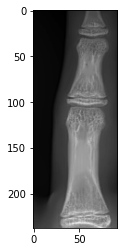

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_val[70,75:75+238,337:337+92],cmap='gray')


plt.show()

In [ ]:
y_p = np.load('/content/y.npy')
tmp = np.load('/content/xv.npy')


X_train,X_val,y_train, y_val = train_test_split(tmp,y_p)

In [ ]:
print(pre_y[70])

[210.45685 461.9989  343.71613 187.7063  203.24272 296.8551  311.72406
 132.39851 337.18106  75.46882  92.29659 238.29309]
